In [1]:
import os
print(os.getcwd())

/Users/pranav/AIML/AI/NLP/MyProjects/ResumeClassification


In [2]:
os.listdir()

['UpdatedResumeDataSet.csv',
 '.DS_Store',
 '.ipynb_checkpoints',
 'main.py',
 'ResumeClassification.ipynb']

In [3]:
import pandas as pd
df = pd.read_csv('UpdatedResumeDataSet.csv', index_col=None)

In [4]:
df.head(10)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [6]:
len(df['Category'].value_counts())

25

In [7]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

In [8]:
cat_column = df['Category'].copy()

In [9]:
df.shape

(962, 2)

In [10]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [11]:
labelencoder = LabelEncoder()
df['Category'] = labelencoder.fit_transform(df['Category'])

In [12]:
label_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))

In [13]:
df

,Category,Resume
0,6,Skills * Programming Languages: Python (pandas...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...
2,6,"Areas of Interest Deep Learning, Control Syste..."
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,6,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,23,Computer Skills: â¢ Proficient in MS office (...
958,23,â Willingness to accept the challenges. â ...
959,23,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,23,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [14]:
label_mapping

{'Advocate': 0,
 'Arts': 1,
 'Automation Testing': 2,
 'Blockchain': 3,
 'Business Analyst': 4,
 'Civil Engineer': 5,
 'Data Science': 6,
 'Database': 7,
 'DevOps Engineer': 8,
 'DotNet Developer': 9,
 'ETL Developer': 10,
 'Electrical Engineering': 11,
 'HR': 12,
 'Hadoop': 13,
 'Health and fitness': 14,
 'Java Developer': 15,
 'Mechanical Engineer': 16,
 'Network Security Engineer': 17,
 'Operations Manager': 18,
 'PMO': 19,
 'Python Developer': 20,
 'SAP Developer': 21,
 'Sales': 22,
 'Testing': 23,
 'Web Designing': 24}

In [15]:
X = df['Resume']
y = df['Category']

In [16]:
X

0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
                             ...                        
957    Computer Skills: â¢ Proficient in MS office (...
958    â Willingness to accept the challenges. â ...
959    PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP/7/8/8.1/10 Database MY...
Name: Resume, Length: 962, dtype: object

In [17]:
y

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: Category, Length: 962, dtype: int64

In [18]:
y.value_counts()

Category
15    84
23    70
8     55
20    48
24    45
12    44
13    42
3     40
10    40
18    40
6     40
22    40
16    40
1     36
7     33
11    30
14    30
19    30
4     28
9     28
2     26
17    25
21    24
5     24
0     20
Name: count, dtype: int64

In [19]:
from keras.utils import to_categorical
import numpy as np
y = np.array(y)

y_encoded = to_categorical(y, num_classes=len(df['Category'].value_counts()))

In [20]:
y_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [21]:
y_encoded.shape

(962, 25)

In [22]:
MAX_FEATURES = 200000

In [23]:
from tensorflow.keras.layers import TextVectorization

In [24]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                              output_sequence_length=1800,
                              output_mode='int')

In [25]:
vectorizer.adapt(X.values)

2024-01-04 13:20:00.888052: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [26]:
vectorized_text = vectorizer(X.values)

In [27]:
import tensorflow as tf

In [28]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y_encoded))
dataset = dataset.cache()
dataset = dataset.shuffle(500)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [29]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding, BatchNormalization
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [31]:
model = Sequential()
model.add(Embedding(MAX_FEATURES+1, 32))
model.add(Bidirectional(LSTM(32, activation='tanh')))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dense(25, activation='softmax'))

2024-01-04 13:20:01.236277: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-04 13:20:01.237165: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-04 13:20:01.237619: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [32]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

In [33]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                          

In [36]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[reduce_lr, early_stopping])

Epoch 1/20


2024-01-04 13:20:01.370769: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [962,25]
	 [[{{node Placeholder/_1}}]]
2024-01-04 13:20:01.370979: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [962,25]
	 [[{{node Placeholder/_1}}]]
2024-01-04 13:20:01.473356: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim

42/42 [==============================] - ETA: 0s - loss: 3.1682 - accuracy: 0.0789

2024-01-04 13:20:18.012520: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [962,25]
	 [[{{node Placeholder/_1}}]]
2024-01-04 13:20:18.012695: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int64 and shape [962,1800]
	 [[{{node Placeholder/_0}}]]
2024-01-04 13:20:18.102807: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_d

42/42 [==============================] - 17s 385ms/step - loss: 3.1682 - accuracy: 0.0789 - val_loss: 3.2121 - val_accuracy: 0.0677 - lr: 0.0010
Epoch 2/20
42/42 [==============================] - 15s 366ms/step - loss: 2.7703 - accuracy: 0.2113 - val_loss: 3.0918 - val_accuracy: 0.1094 - lr: 0.0010
Epoch 3/20
42/42 [==============================] - 17s 405ms/step - loss: 1.9105 - accuracy: 0.4092 - val_loss: 2.7609 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/20
42/42 [==============================] - 17s 405ms/step - loss: 1.1858 - accuracy: 0.6429 - val_loss: 2.3616 - val_accuracy: 0.7656 - lr: 0.0010
Epoch 5/20
42/42 [==============================] - 17s 418ms/step - loss: 0.7934 - accuracy: 0.7351 - val_loss: 1.7807 - val_accuracy: 0.8802 - lr: 0.0010
Epoch 6/20
42/42 [==============================] - 18s 436ms/step - loss: 0.5527 - accuracy: 0.8363 - val_loss: 1.2972 - val_accuracy: 0.9219 - lr: 0.0010
Epoch 7/20
42/42 [==============================] - 19s 458ms/step - loss: 

In [37]:
model.save('resume_classification.h5')

<Figure size 800x500 with 0 Axes>

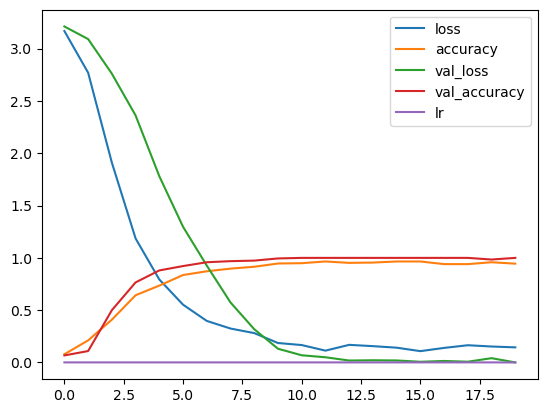

In [38]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 5))
pd.DataFrame(hist.history).plot()
plt.show()

In [39]:
model = tf.keras.models.load_model('resume_classification.h5')

2024-01-04 13:25:56.340482: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-04 13:25:56.341029: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-04 13:25:56.341563: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [40]:
for batch in test.as_numpy_iterator():
    xtrue, ytrue = batch
    yhat = model.predict(xtrue)
    print(np.argmax(yhat[0]), np.argmax(ytrue[0]))
    for category, idx in label_mapping.items():
        if idx == np.argmax(yhat[0]):
            print(category)

2024-01-04 13:25:56.541040: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [962,25]
	 [[{{node Placeholder/_1}}]]
2024-01-04 13:25:56.541257: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int64 and shape [962,1800]
	 [[{{node Placeholder/_0}}]]
2024-01-04 13:25:56.672055: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_d

1/1 [==============================] - 0s 342ms/step
10 10
ETL Developer
1/1 [==============================] - ETA: 0s

2024-01-04 13:25:56.766326: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-04 13:25:56.766922: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-04 13:25:56.767679: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 47ms/step
8 8
DevOps Engineer
1/1 [==============================] - 0s 48ms/step
3 3
Blockchain
1/1 [==============================] - 0s 47ms/step
9 9
DotNet Developer
1/1 [==============================] - 0s 49ms/step
18 18
Operations Manager
1/1 [==============================] - 0s 48ms/step
14 14
Health and fitness


In [41]:
def resume_tester(skill_list):
    vectorized_skill = vectorizer([skill_list])
    results = model.predict(vectorized_skill)
    print(results)
    print(np.argmax(results[0]))
    for category, idx in label_mapping.items():
        if idx == np.argmax(results[0]):
            print(category)

In [42]:
skill = '''DATA SCIENCE/MACHINE LEARNING/DEEP LEARNING
MATHEMATICS FOR ML AND DL
Matrices, Probability, Statistics, Algebra
PYTHON PACKAGES AND FRAMEWORKS
Scikit-Learn, Tensorflow, Keras, OpenCV, Pandas, Beautiful Soup,
Kivy, Selenium, TkInter, Seaborn, Matplotlib, PyQt5, Numpy
WEB DEVELOPMENT
HTML, CSS, Flask, Streamlit
PROGRAMMING LANGUAGES
C, C++
, Java, Python
DATABASE
MongoDB, MySQL
'''

resume_tester(skill)

1/1 [==============================] - 0s 36ms/step
[[6.9771199e-03 2.0422142e-07 1.6921776e-06 7.0488088e-05 1.8123696e-04
  3.8487498e-05 9.7256774e-01 1.4899248e-04 5.7990956e-06 7.7517894e-03
  2.6082416e-08 3.9849494e-04 8.0028462e-07 4.9138507e-05 6.1504697e-06
  1.2773070e-04 1.0606575e-07 3.1875519e-08 2.1947737e-07 1.0070152e-02
  3.5011146e-06 1.5928128e-03 6.9153003e-07 4.7118174e-06 1.8298549e-06]]
6
Data Science
